# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import matplotlib

mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']
print(X,y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] ['5' '0' '4' ... '4' '5' '6']


### Now take a look at the shapes of the X and y matricies 

In [88]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [74]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

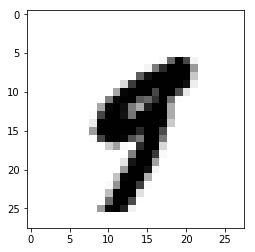

In [77]:
element = X[36000]
plt.imshow(element.reshape(28,28), cmap = matplotlib.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [78]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [98]:
X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 

In [99]:
y_train_5 = np.where(y_train == '5', 1, 0)
y_test_5 = np.where(y_test == '5', 1, 0)

In [100]:
y_train_5.shape

(60000,)

In [101]:
y_test_5.shape

(10000,)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [102]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train_5)

/Users/katja/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Does the classifier predict correctly the 36000th digit we picked before?

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [124]:
y_pred_test = model_logistic.predict(X[36000].reshape(1, -1))

In [125]:
y_pred_test

array([0])

In [ ]:
'''Yes, it has predicted correctly. It says it's not a five and it's not'''

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [51]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [111]:
never_5_clf.fit(X_train, y_train_5)
never5_pred = never_5_clf.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [113]:
# Logistic Regression

print("Confusion Matrix for the Logistic Regression")
print(confusion_matrix(y_test_5, y_pred_test_lg))
print("Prescision, Recall, F-Score:",  precision_recall_fscore_support(y_test_5, y_pred_test_lg, average='weighted')[0:3])

Confusion Matrix for the Logistic Regression
[[9054   54]
 [ 274  618]]
Prescision, Recall, F-Score (0.9660783692722372, 0.9672, 0.9650887986864353)


In [115]:
# Never 5 Classifier

print("Confusion Matrix for the Never 5 Classifier")
print(confusion_matrix(y_test_5, y_pred_test_clf))
print("Percision, Recall, F-Score:", precision_recall_fscore_support(y_test_5, y_pred_test_clf, average='weighted')[0:3])

Confusion Matrix for the Never 5 Classifier
[[9108    0]
 [ 892    0]]
Percision, Recall, F-Score: (0.82955664, 0.9108, 0.8682820180029306)


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
'''Both methods have a high recall but the first one has a much higher precision which leads to a much higher f1 score.'''

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

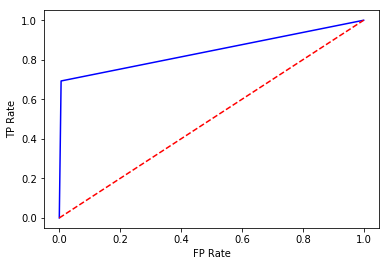

In [119]:
from sklearn.metrics import roc_curve

# for Logistic Regression
fpr, tpr, threshold = roc_curve(y_test_5, y_pred_test_lg)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

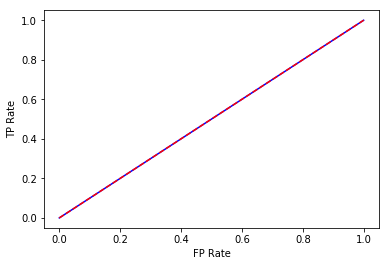

In [117]:
#  for Never 5 Classifier
fpr, tpr, threshold = roc_curve(y_test_5, y_pred_test_clf)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

### Now find the roc_auc_score for each. 

In [122]:
from sklearn.metrics import roc_auc_score

roc_auc_score_log = roc_auc_score(y_test_5, y_pred_test_lg)

roc_auc_score_never = roc_auc_score(y_test_5, y_pred_test_clf)

print('auc Logistic Regression', roc_auc_score_log)
print('auc Logistic Regression', roc_auc_score_never)

auc Logistic Regression 0.8434481291763413
auc Logistic Regression 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [123]:
'''The Logistic Regression model performs much better than the Never 5 Classifier'''